In [1]:
import cv2
import pytesseract
import os
import numpy as np
import pyocr
import PIL
from PIL import Image

In [103]:
img=cv2.imread("plate2.jpeg")


In [8]:
tools = pyocr.get_available_tools()
# The tools are returned in the recommended order of usage
tool = tools[0]
tool

<module 'pyocr.tesseract' from '/home/umarkhan/anaconda3/envs/umar_analyst/lib/python3.7/site-packages/pyocr/tesseract.py'>

In [9]:

langs = tool.get_available_languages()
lang = langs[0]

Dy 177

ISLAMABAD


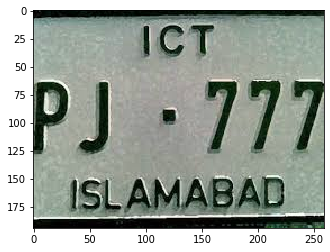

In [115]:
plt.imshow(img)
text=pytesseract.image_to_string(img,config='--psm 3')
print(text)

# digits = tool.image_to_string(
#     Image.open('KK607.jpg'),
#     lang=lang,
#     builder=pyocr.tesseract.DigitBuilder())
# digits

test_tesseract/image36.jpg


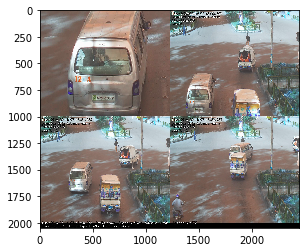


test_tesseract/image27.jpg


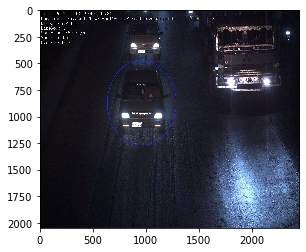

Time: 2017-12-13 19:40:20. 731
Location: Faizabad Chowk west2-I. J.P road t
Direction:W T E

LaneNo.: 1

SpeedLimit:80 Km/h

Speed: O Km/h

Overspeed: No a -
test_tesseract/image61.jpg


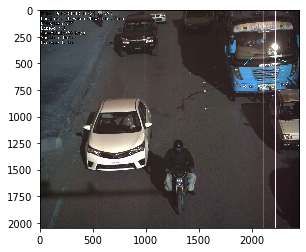

Time: 2017-01-10 15224: 49.782
Location: Khayaban Chowk Blue Area
Direction: EIW

LaneNo.: 1

SpeedLimit:80 Km/h

Speed: 0 Km/h aa
Overspeed: No ar
test_tesseract/image70.jpg


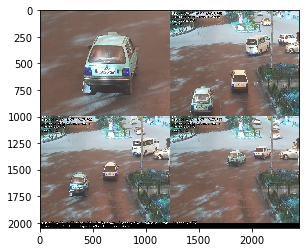


test_tesseract/image71.jpg


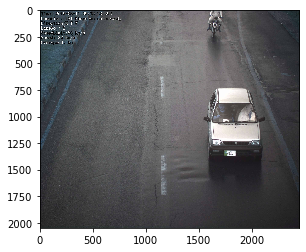

Time: 2019-05-11 09:10:23. 592
Location: ISI Khayaban soharrwady
Direction:E T W

LaneNo. : 2

SpeedLimit:80 Km/h

Speed: 32 Km/h

Overspeed: No
test_tesseract/image51.jpg


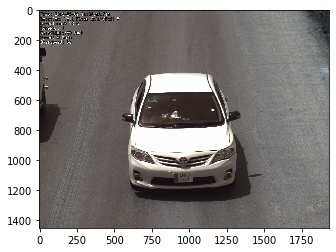

Times 20-05-02 ilisd4e4il, 714
Locations Toll Plaza Entry/Exit W
Direction:W 10) E

IeraVeINOs 8 J

Speedlimit 280 Km/h

Speed? 0 Km/h

Overspeed: No
test_tesseract/image39.jpg


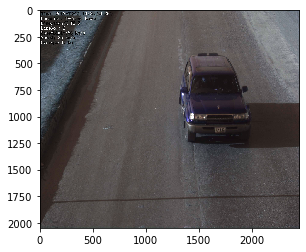

LaneNo. : 7
test_tesseract/image16.jpg


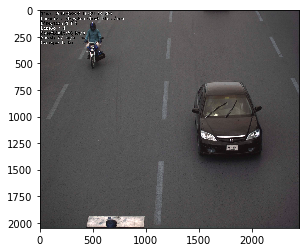

Time: 2019-06-03 15:09:48,200
Location: Khayaban Chowk Blue Atrea
Direction:N 1s if

LaneNo. ; 4
SpeedLimit:80 Km/h
Speed: 57 Km/h
Overspeed: No

a il
>
test_tesseract/image2.jpg


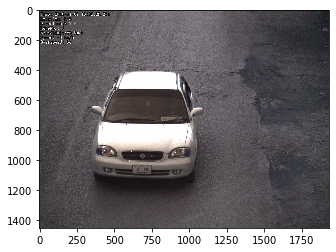

Time: 2018511502) 16336228) 25)
Location: H-8

DirectionsW T EB

LaneNo. : 1

SpeedLimit:80 Km/h

Speed: 40 Km/h

Overspeed: No
test_tesseract/image160.jpg


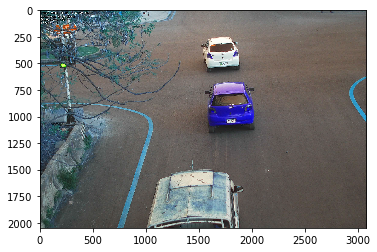

Locatiiony Avi ein
aitiacroxe ak ne NTS
IBeTnreINOR GT

WS
test_tesseract/image3.jpg


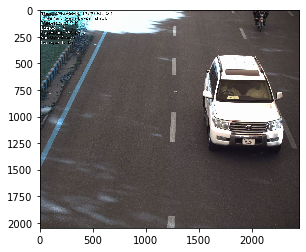

=) .
eel miss. 80 Km “e
Speed: 52 Km/h
Overspeed: No
test_tesseract/image162.jpg


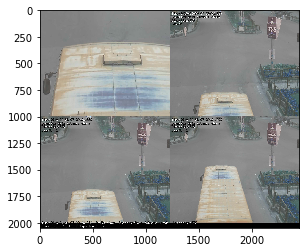

In [11]:
ppath="test_tesseract"
for x in os.listdir(ppath):
    fullpath=os.path.join(ppath,x)
    img=cv2.imread(fullpath)
    img2=img[0:500,0:1000]
    print(fullpath)
    plt.imshow(img)
    plt.show()
    
    text=pytesseract.image_to_string(img2,lang='eng')
    print(text)


In [5]:
from matplotlib import pyplot as plt

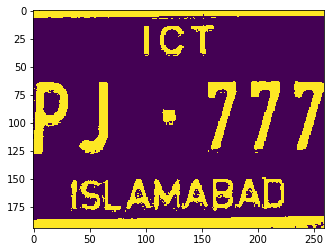

In [21]:
plt.imshow(thresh)

In [22]:
# img2=img[0:500,0:1000]

In [23]:
# plt.imshow(img2)

In [30]:
text=pytesseract.image_to_string(img,config='--psm 10')
print(text)

PAK 047 |


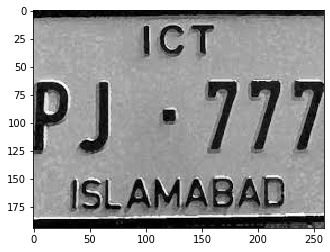

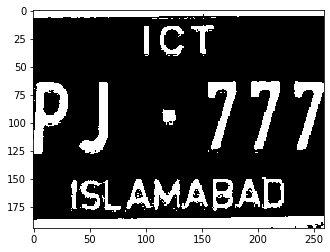

In [95]:
img=cv2.imread("plate2.jpeg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")
plt.show()
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)#binary
plt.imshow(thresh,cmap="gray")
plt.show()

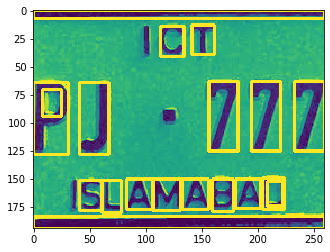

In [100]:
cnts,heir = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
zero=np.zeros((img.shape[0],img.shape[1],3))
x=img.shape[0]
y=img.shape[1]
area_orig=x*y

med = np.median(np.unique(sorted([cv2.contourArea(x) for x in cnts if cv2.contourArea(x) > 0]))) /area_orig
# print(mean)
sort_dict={}
zero=np.zeros((x,y))
for c in cnts:
    (x, y, W, H) = cv2.boundingRect(c)
    area=W*H
    if(area/area_orig>med):
        cv2.rectangle(img,(x,y),(x+W,y+H),(255,0,0),2)
        roi = (thresh[y:y+H, x:x+W])/1.0
        
        #roi = cv2.blur(roi,(5,5))
        #roi=cv2.bitwise_not(roi)
        
        if(W>H):
            z=np.zeros((W,W))
            z[0:H,0:W]=roi
        
        else:
            z=np.zeros((H,H))
            z[0:H,0:W]=roi
    
          
        roi=cv2.resize(z,(64,64))
        sort_dict[(x,y)]=roi
#         plt.imshow(roi)
#         plt.show()
#         roi=tf.expand_dims(tf.expand_dims(roi,0),-1)
#         r=model.predict_classes(roi)
# #         print(r)
#         print(num_to_char(r))

plt.imshow(img)

In [101]:
sort_dict=[sort_dict[x] for x in sorted(sort_dict)]

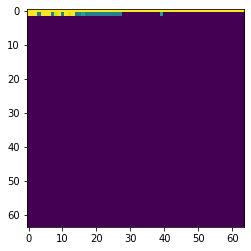

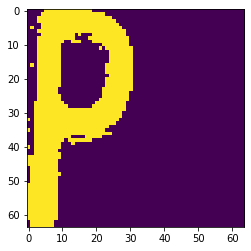

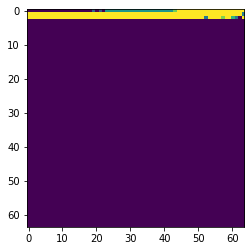

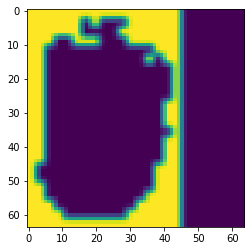

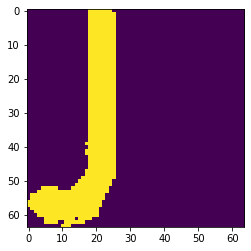

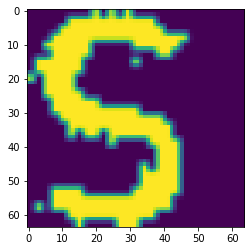

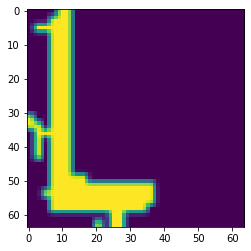

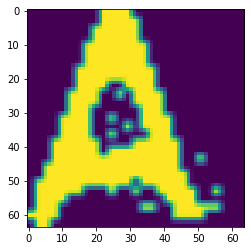

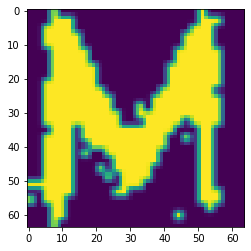

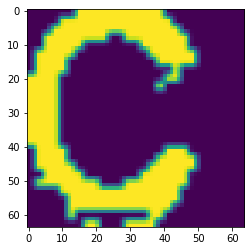

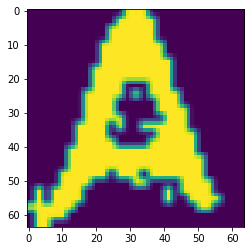

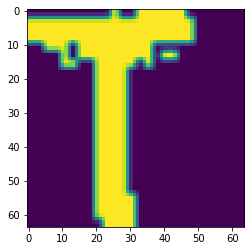

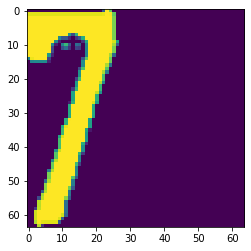

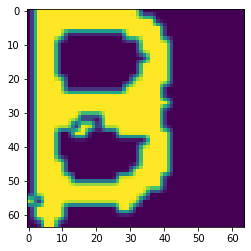

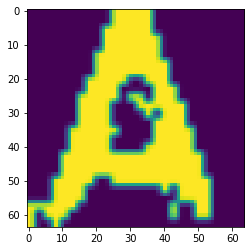

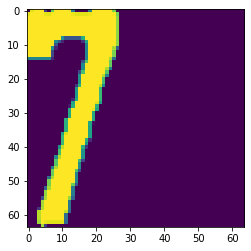

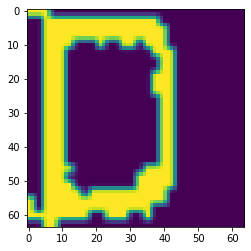

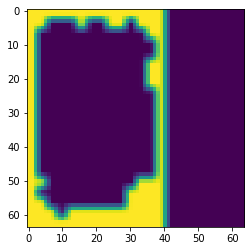

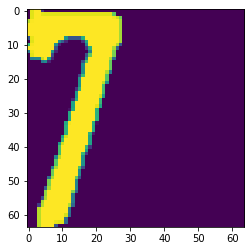

In [102]:
for roi in sort_dict:
    plt.imshow(roi)
    plt.show()
    digits = tool.image_to_string(
    Image.fromarray(roi),lang=lang,
    builder=pyocr.tesseract.DigitBuilder())
    print(digits)